<a href="https://colab.research.google.com/github/Vincent-Kwan/Safe-Roads-Competition/blob/master/Senior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('KSI.csv')

In [6]:
df.INVAGE.unique()

array(['unknown', '65 to 69', '45 to 49', '25 to 29', '30 to 34',
       '40 to 44', '20 to 24', '55 to 59', '0 to 4', '35 to 39',
       '60 to 64', '50 to 54', '15 to 19', '80 to 84', '70 to 74',
       '75 to 79', '90 to 94', '10 to 14', '5 to 9', '85 to 89',
       'Over 95'], dtype=object)

In [28]:
conditions = [
              (df['INVAGE'] < '20 to 24' ),
              (df['INVAGE'] >= '20 to 24') & (df['INVAGE'] < '65 to 69'),
              (df['INVAGE'] >= '65 to 69') &  (df['INVAGE'] <= 'Over 95'),
              (df['INVAGE'] == 'unknown')
]

In [29]:
values = ['Young', 'Adult', 'Senior', 'unknown']

In [30]:
df['Age'] = np.select(conditions, values)

In [37]:
df[['INVAGE', 'Age']].head()

,INVAGE,Age
0,unknown,unknown
1,65 to 69,Senior
2,45 to 49,Adult
3,unknown,unknown
4,25 to 29,Adult


In [42]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['MONTH'] = df['DATE'].dt.month_name()
df['DAY'] = df['DATE'].dt.day_name()

In [48]:
#copyrights@VincentKwan

def drinkcond(col, colname):
    if col[colname] in ('Ability Impaired, Alcohol Over .08', 'Had Been Drinking', 'Ability Impaired, Alcohol', 'Ability Impaired, Alcohol Over .80'):
        return 'Drinking'
    
    # if not drinking, return condition
    
    return col[colname]
    
df['DRIVCOND'] = df.apply(drinkcond, args = ('DRIVCOND',), axis = 1)

In [49]:
seniors = df[df['Age'] == 'Senior']
seniors.shape

(2077, 60)

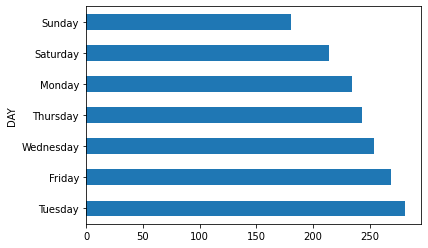

In [44]:
seniors.groupby('DAY')['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'barh')

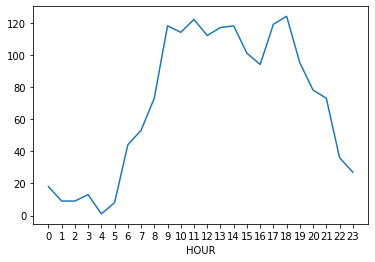

In [46]:
seniors.sort_values('HOUR', ascending = False).groupby(['HOUR'])['ACCNUM'].nunique().plot(kind = 'line', xticks = range(24))

In [56]:
seniors.groupby('INVTYPE')['ACCNUM'].count().sort_values(ascending = False)

INVTYPE
Driver               925
Pedestrian           795
Passenger            266
Cyclist               50
Truck Driver          16
Motorcycle Driver     10
Wheelchair             8
Other                  5
Moped Driver           2
Name: ACCNUM, dtype: int64

##Senior Drivers

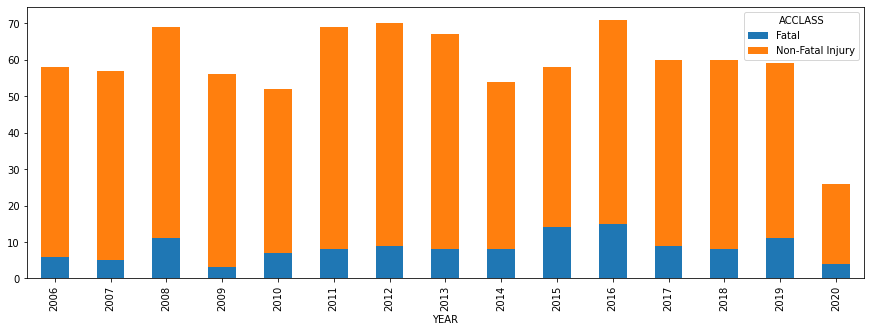

In [116]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby(['YEAR','ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind = 'bar', stacked=True, figsize = (15, 5))

In [117]:
injury_over_years = seniors[seniors['INVTYPE'] == 'Driver'].groupby(['YEAR','ACCLASS'])['ACCNUM'].nunique()
injury_over_years.groupby(level=[0]).apply(lambda g: 100* g / g.sum()).round(2)

YEAR  ACCLASS         
2006  Fatal               10.34
      Non-Fatal Injury    89.66
2007  Fatal                8.77
      Non-Fatal Injury    91.23
2008  Fatal               15.94
      Non-Fatal Injury    84.06
2009  Fatal                5.36
      Non-Fatal Injury    94.64
2010  Fatal               13.46
      Non-Fatal Injury    86.54
2011  Fatal               11.59
      Non-Fatal Injury    88.41
2012  Fatal               12.86
      Non-Fatal Injury    87.14
2013  Fatal               11.94
      Non-Fatal Injury    88.06
2014  Fatal               14.81
      Non-Fatal Injury    85.19
2015  Fatal               24.14
      Non-Fatal Injury    75.86
2016  Fatal               21.13
      Non-Fatal Injury    78.87
2017  Fatal               15.00
      Non-Fatal Injury    85.00
2018  Fatal               13.33
      Non-Fatal Injury    86.67
2019  Fatal               18.64
      Non-Fatal Injury    81.36
2020  Fatal               15.38
      Non-Fatal Injury    84.62
Name: ACCNUM, dty

In [119]:
seniors[(seniors['INVTYPE'] == 'Driver') & (seniors['INJURY'] == 'Fatal')].groupby(['YEAR'])['ACCNUM'].count()

YEAR
2006    1
2007    1
2008    3
2009    2
2010    2
2011    3
2012    2
2013    1
2014    4
2015    3
2016    6
2017    3
2018    2
2019    5
Name: ACCNUM, dtype: int64

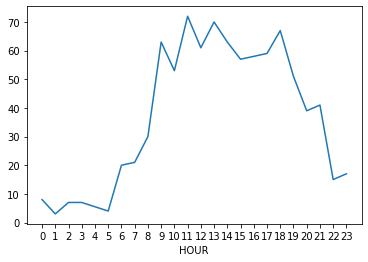

In [80]:
seniors[seniors['INVTYPE'] == 'Driver'].sort_values('HOUR', ascending = False).groupby(['HOUR'])['ACCNUM'].nunique().plot(kind = 'line', xticks = range(24))

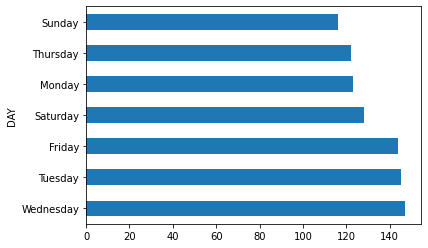

In [85]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('DAY')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

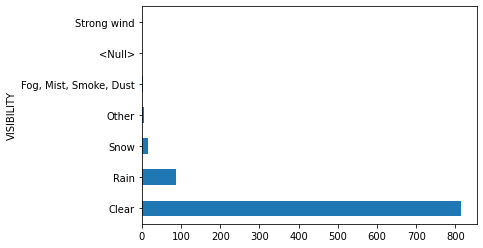

In [84]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('VISIBILITY')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

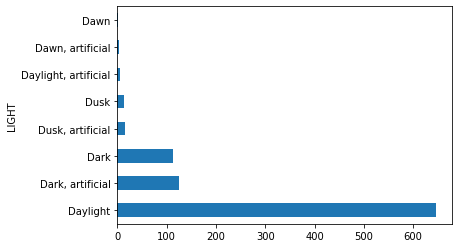

In [86]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('LIGHT')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

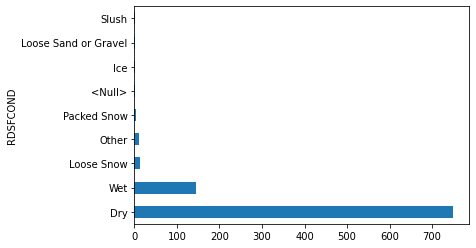

In [87]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('RDSFCOND')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

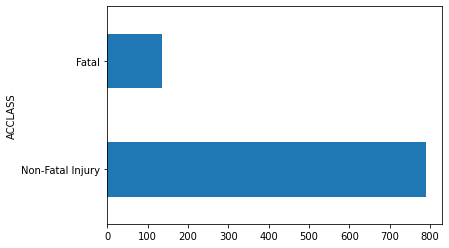

In [88]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('ACCLASS')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

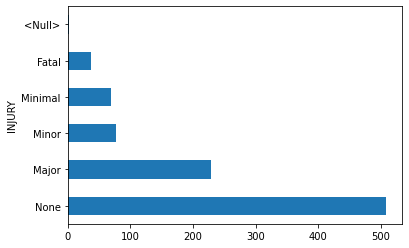

In [91]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('INJURY')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

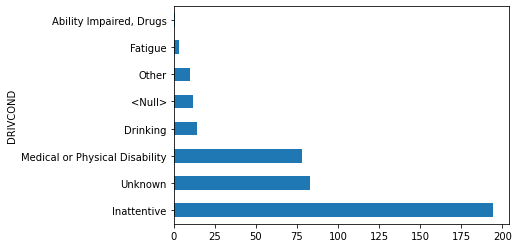

In [62]:
#ignoring normal condition
seniors[seniors['INVTYPE'] == 'Driver'].groupby('DRIVCOND')['ACCNUM'].count().sort_values(ascending = False)[1:].plot(kind = 'barh')

Looking at the drivers act based on driver condition

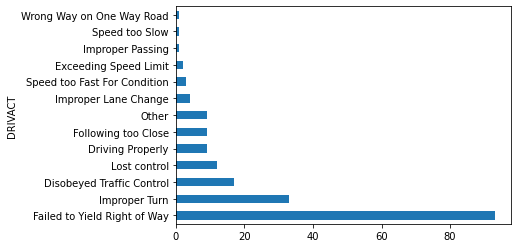

In [94]:
seniors[(seniors['INVTYPE'] == 'Driver') &(seniors['DRIVCOND'] == 'Inattentive')].groupby('DRIVACT')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

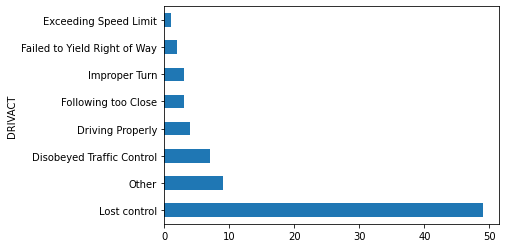

In [95]:
seniors[(seniors['INVTYPE'] == 'Driver') &(seniors['DRIVCOND'] == 'Medical or Physical Disability')].groupby('DRIVACT')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

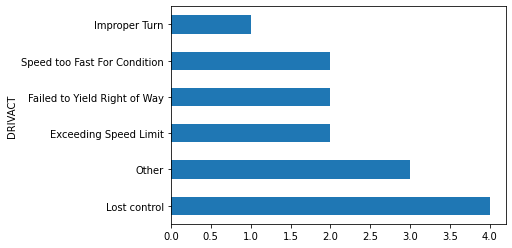

In [96]:
seniors[(seniors['INVTYPE'] == 'Driver') &(seniors['DRIVCOND'] == 'Drinking')].groupby('DRIVACT')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

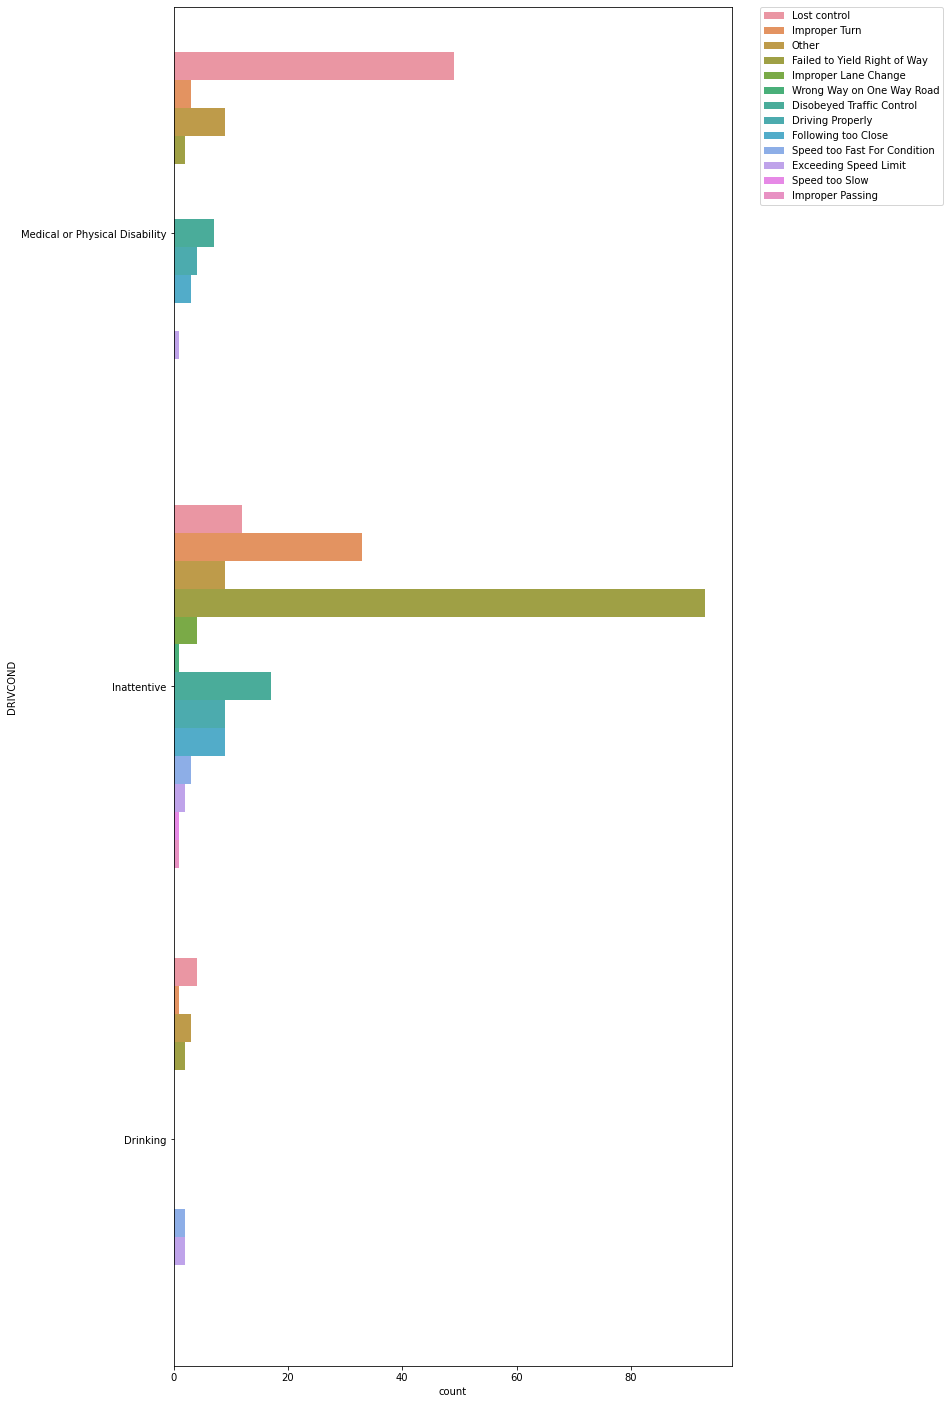

In [132]:
plt.figure(figsize = (10,25))
sns.countplot(data = seniors[(seniors['INVTYPE'] == 'Driver') & ((seniors['DRIVCOND'] == 'Drinking') | (seniors['DRIVCOND'] == 'Inattentive') | (seniors['DRIVCOND'] == 'Medical or Physical Disability'))], y = 'DRIVCOND', hue = 'DRIVACT')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

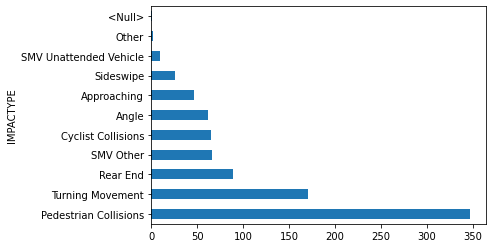

In [93]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('IMPACTYPE')['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'barh')

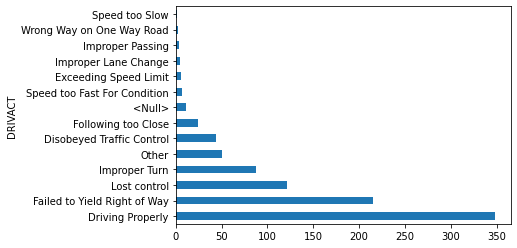

In [68]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('DRIVACT')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

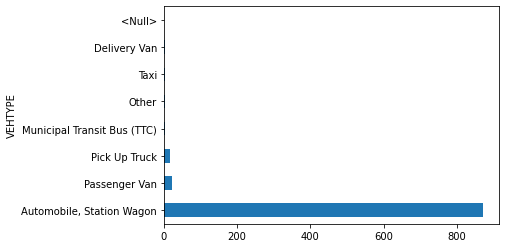

In [76]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('VEHTYPE')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

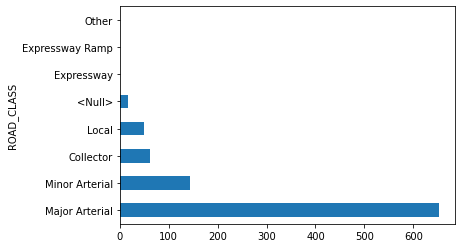

In [101]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('ROAD_CLASS')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

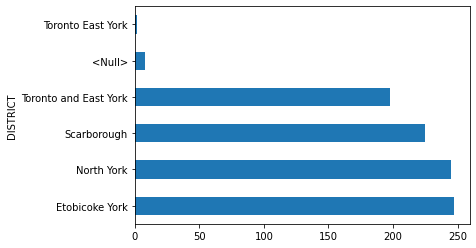

In [102]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('DISTRICT')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

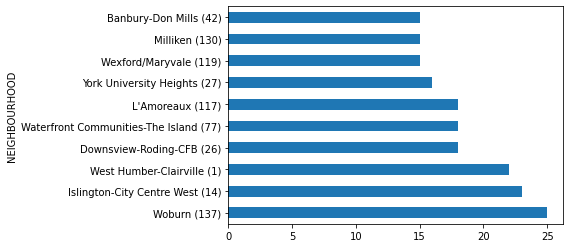

In [114]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('NEIGHBOURHOOD')['ACCNUM'].count().sort_values(ascending = False)[:10].plot(kind = 'barh')

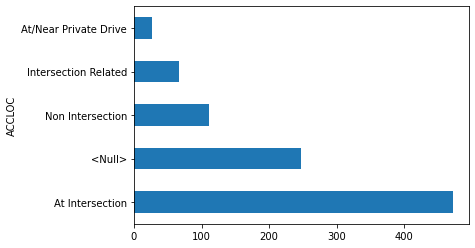

In [103]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('ACCLOC')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

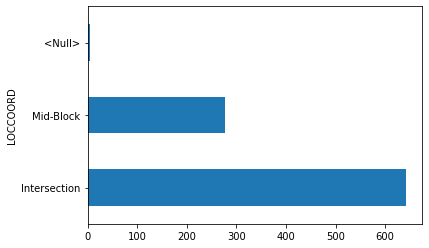

In [104]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('LOCCOORD')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

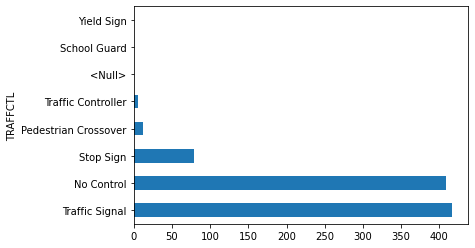

In [105]:
seniors[seniors['INVTYPE'] == 'Driver'].groupby('TRAFFCTL')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

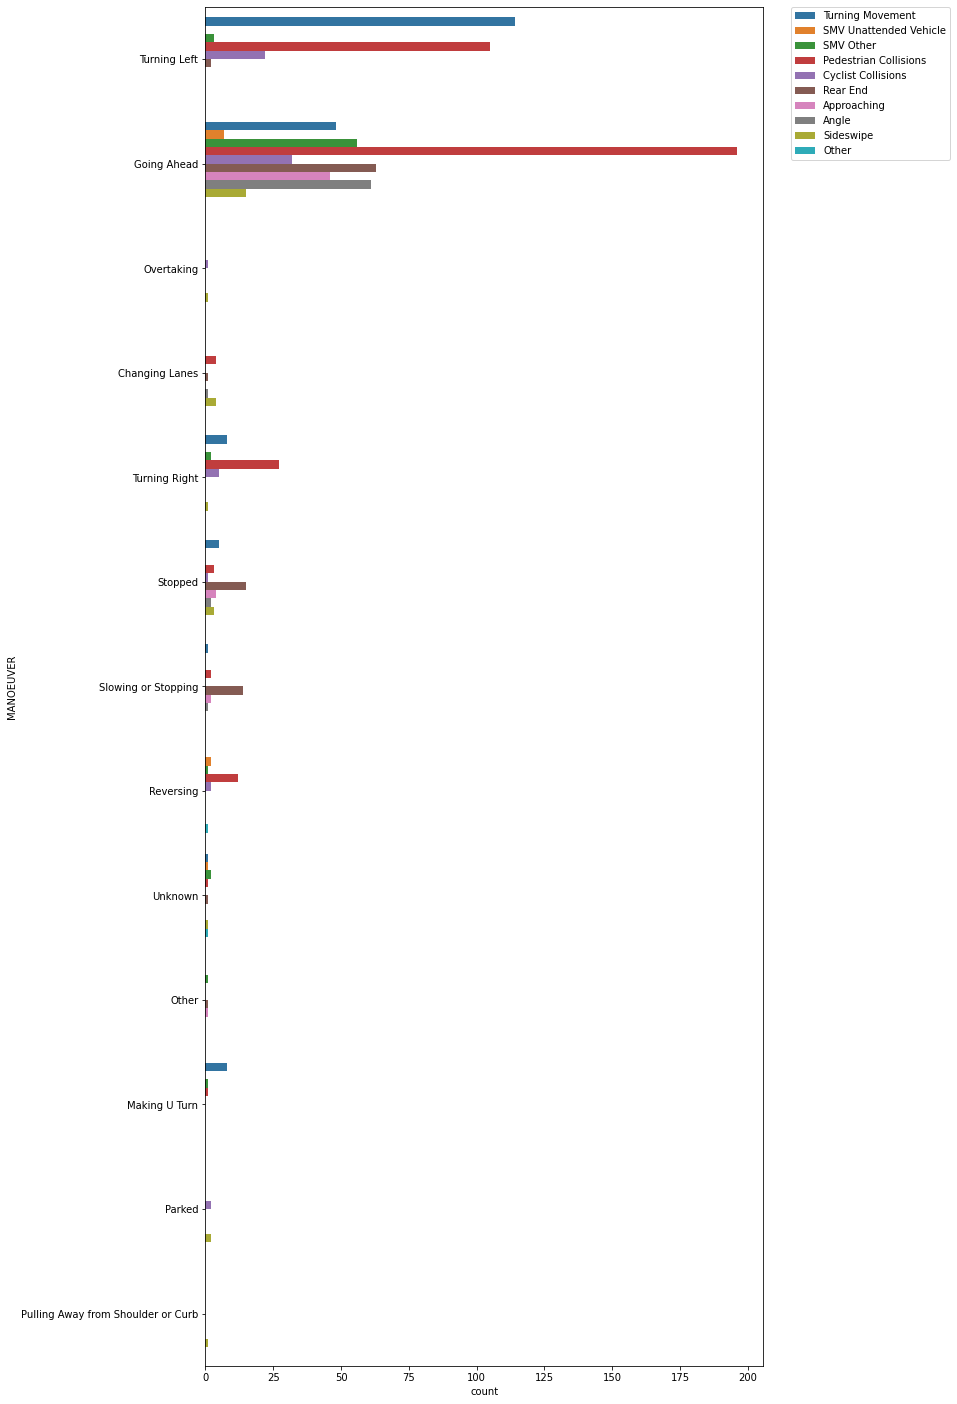

In [121]:
# MANOEUVER by IMPACTYPE

plt.figure(figsize = (10,25))
sns.countplot(data = seniors[(seniors['INVTYPE'] == 'Driver') & (seniors['MANOEUVER'] != '<Null>') & (seniors['IMPACTYPE'] != '<Null>')], y = 'MANOEUVER', hue = 'IMPACTYPE')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

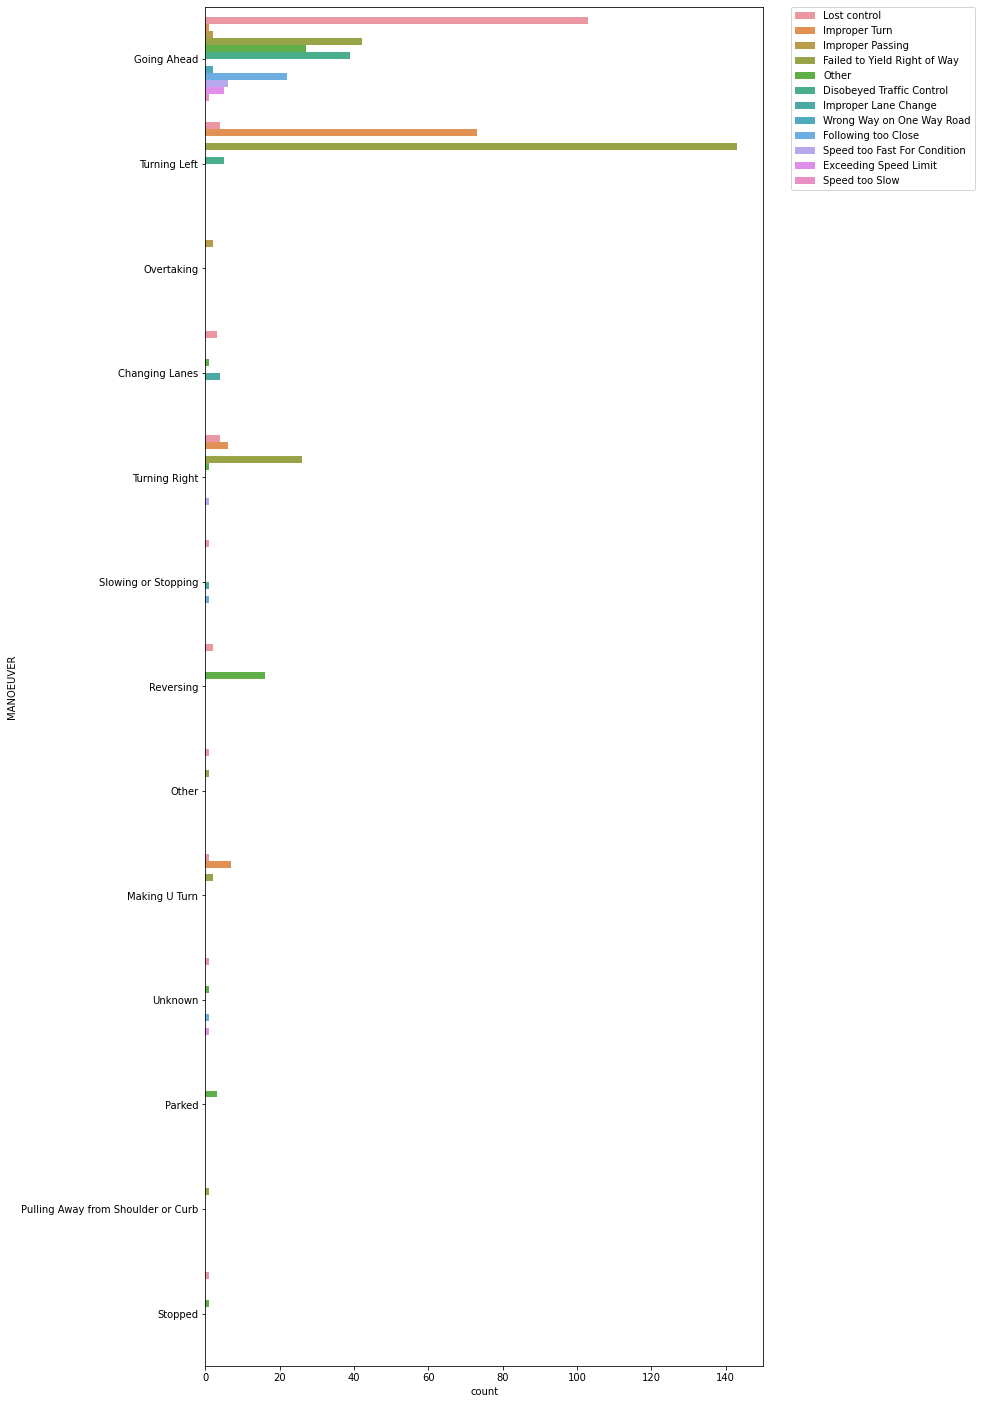

In [123]:
plt.figure(figsize = (10,25))
sns.countplot(data =seniors[(seniors['INVTYPE'] == 'Driver') & (seniors['MANOEUVER'] != '<Null>') & (seniors['DRIVACT'] != '<Null>') & (seniors['DRIVACT'] != 'Driving Properly')], y = 'MANOEUVER', hue = 'DRIVACT')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##Senior Pesdestrians

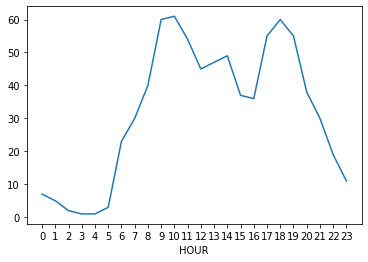

In [97]:
seniors[seniors['INVTYPE'] == 'Pedestrian'].sort_values('HOUR', ascending = False).groupby(['HOUR'])['ACCNUM'].nunique().plot(kind = 'line', xticks = range(24))

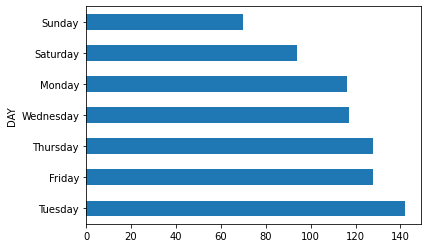

In [98]:
seniors[seniors['INVTYPE'] == 'Pedestrian'].groupby('DAY')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

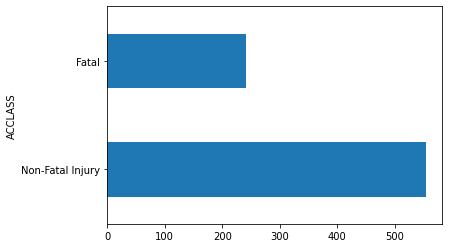

In [99]:
seniors[seniors['INVTYPE'] == 'Pedestrian'].groupby('ACCLASS')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

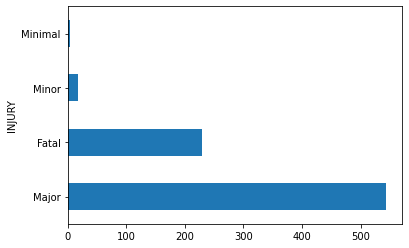

In [100]:
seniors[seniors['INVTYPE'] == 'Pedestrian'].groupby('INJURY')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

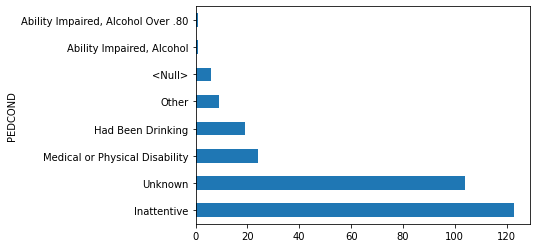

In [64]:
#ignoring normal condition
seniors[seniors['INVTYPE'] == 'Pedestrian'].groupby('PEDCOND')['ACCNUM'].count().sort_values(ascending = False)[1:].plot(kind = 'barh')

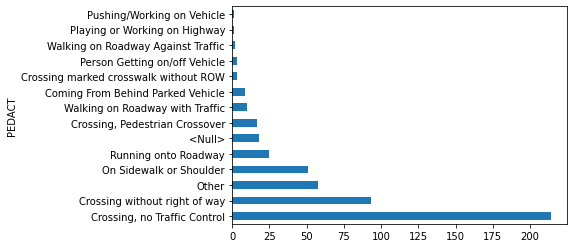

In [69]:
seniors[seniors['INVTYPE'] == 'Pedestrian'].groupby('PEDACT')['ACCNUM'].count().sort_values(ascending = False)[1:].plot(kind = 'barh')

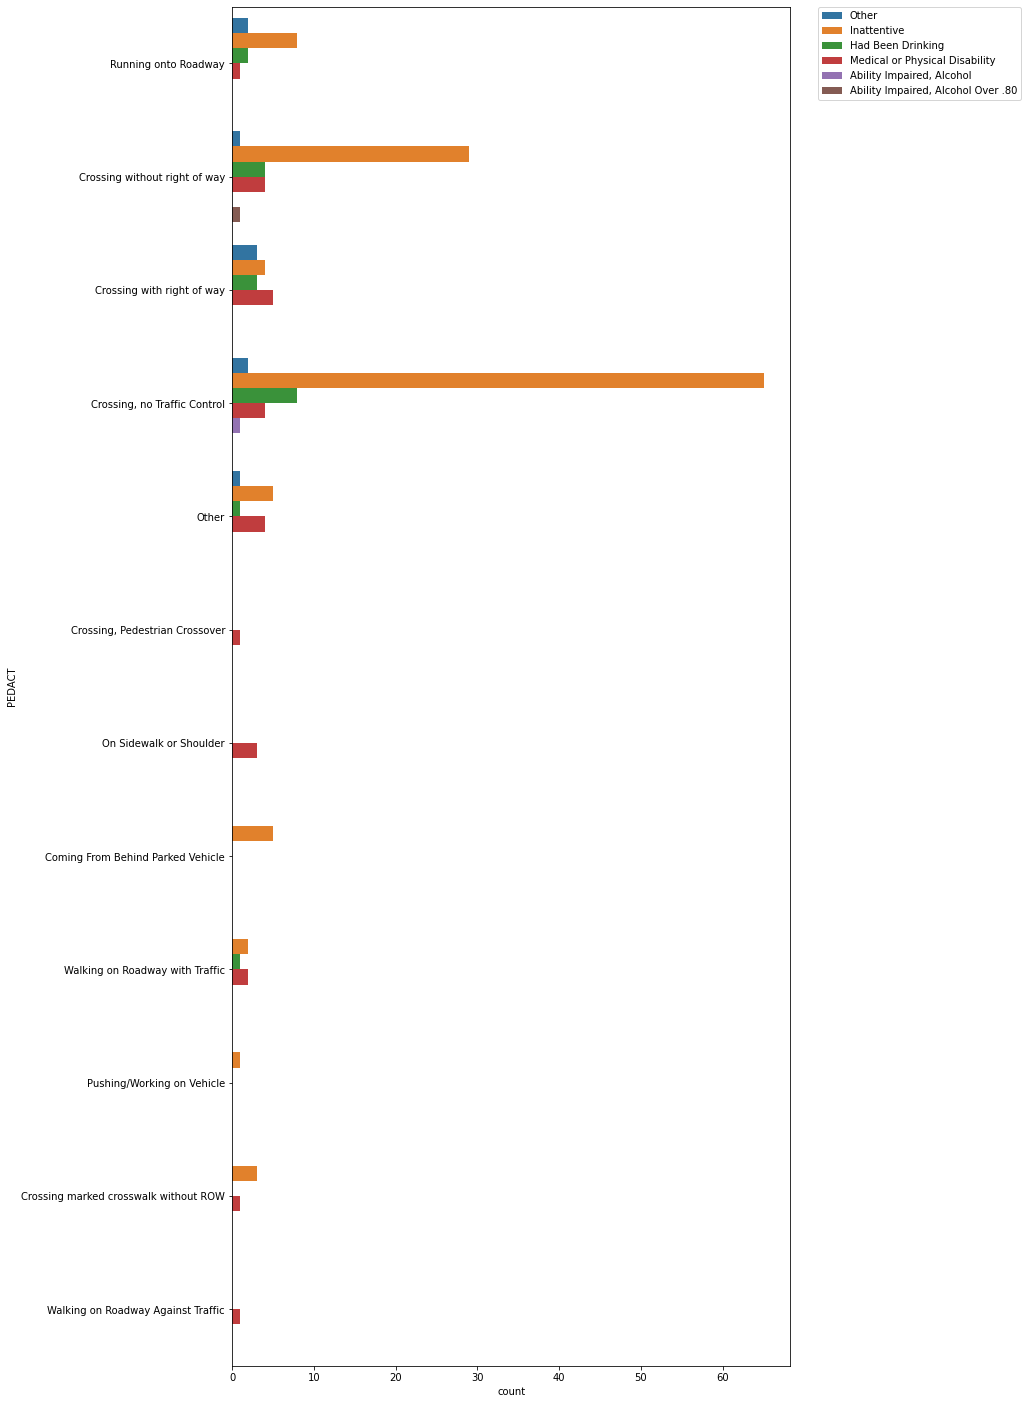

In [135]:
plt.figure(figsize = (10,25))
sns.countplot(data = seniors[(seniors['PEDACT'] != '<Null>') & (seniors['PEDCOND'] != '<Null>') & (seniors['PEDCOND'] != 'Normal')&  (seniors['PEDCOND'] != 'Unknown')], y = 'PEDACT', hue = 'PEDCOND')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

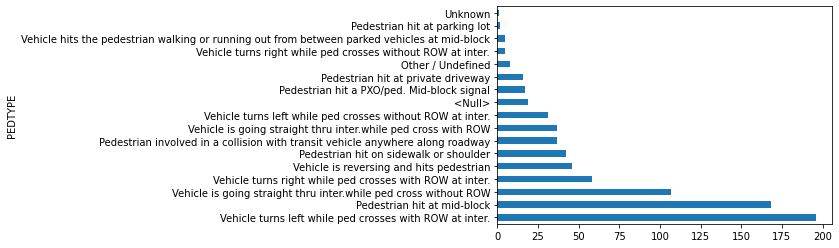

In [73]:
seniors[seniors['INVTYPE'] == 'Pedestrian'].groupby('PEDTYPE')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

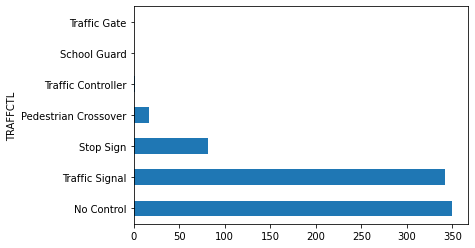

In [106]:
seniors[seniors['INVTYPE'] == 'Pedestrian'].groupby('TRAFFCTL')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

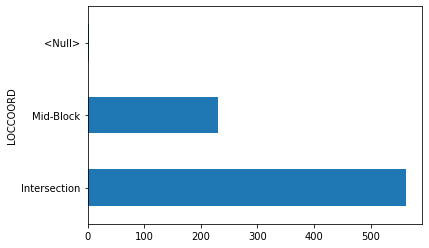

In [108]:
seniors[seniors['INVTYPE'] == 'Pedestrian'].groupby('LOCCOORD')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

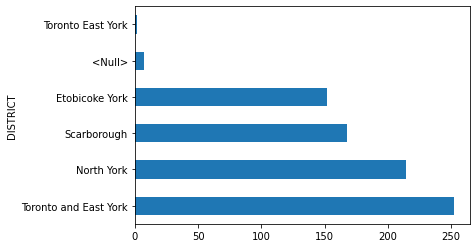

In [109]:
seniors[seniors['INVTYPE'] == 'Pedestrian'].groupby('DISTRICT')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

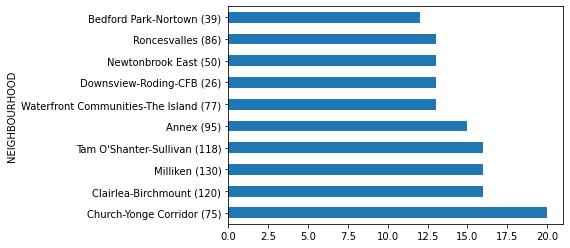

In [115]:
seniors[seniors['INVTYPE'] == 'Pedestrian'].groupby('NEIGHBOURHOOD')['ACCNUM'].count().sort_values(ascending = False)[:10].plot(kind = 'barh')

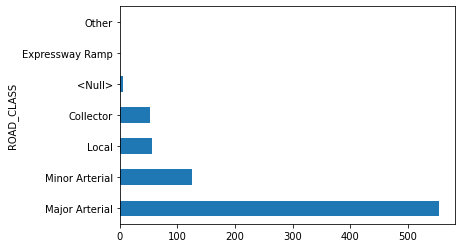

In [110]:
seniors[seniors['INVTYPE'] == 'Pedestrian'].groupby('ROAD_CLASS')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')

##Senior Passenger

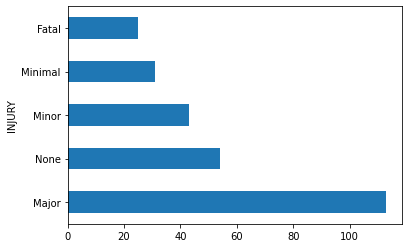

In [75]:
seniors[seniors['INVTYPE'] == 'Passenger'].groupby('INJURY')['ACCNUM'].count().sort_values(ascending = False).plot(kind = 'barh')